## 👨🏻‍🔬 Principal Component Analysis

In feature transformation, we are interested in finding a function  $z=f(x)$ that transforms a given vector of featurs $(x_1, x_2,...,x_n)$ into another $(z_1, z_2,...,z_l)$ that improves the machine learning task at hand (e.g., speed or predictive performance). A common genre of feature transformation is dimensionality reduction which enforces that $l<n$ which obviously improves speed but also often improves predictive performance as alleviates the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) problem.

You can easily show that if we restrict ourselves to *linear feature transformations* that is, each output feature is linear in the input features: $$z_i=f(x)=a_1 x_1 + a_2 x_2 +...+a_n x_n$$

then such transformation can be represented by the following matrix multiplication for some choice of $A$:

$$z_{l×1} = A_{l×n} x_{n×1} $$

and the inverse transformation could approximately reconstruct the output with:

$$x_{n×1} = A^T_{n×l} z_{l×1} $$

### ⚗️ PCA

PCA solves the feature transformation problem via two steps:

1. Find the matrix $A$ that transform the points into a new space where the features are uncorrelated

$$z_{n×1} = A_{n×n} x_{n×1} $$

2. Filter out rows of $A$ corresponding to features of lowest variance, so the dimensionality reduction equation as expected becomes

$$z_{l×1} = A_{l×n} x_{n×1} $$

✦ In the lecture you have proven that PCA can perform (1) by setting $A=U^T$ where $U_{n×n}$ is a matrix containing (as columns) the eigenvectors $k_1, k_2, ...,k_n$ of the covariance matrix of the data which we call the *"principal components"* 

✦ You have also shown that in this case the eigenvalues of the covariance matrix $λ_1, λ_2,...,λ_n$ correspond one-to-one to such eigenvectors and represent the variances of the new $n$ uncorrelated features.

- Thereby, to accomplish (2), if the total variance is $Σ_{i=0}^n λ_i$ then we can achieve dimensionality reduction by keeping only the $l$ eigenvectors in $U$ that have most of the variance (i.e., the eigenvectors corresponding to the top $l$ eigenvalues) where $l$ is a user-defined hyperparameter.

- Alternatively, we can keep adding the variances $λ_1, λ_2,...,λ_n$ descendingly and stop once we have captured a percentage of the total variance (e.g., $\frac{λ_1+λ_3+λ_5}{Σ_{i=0}^n λ_i}=0.9$ so we only need three eigenvectors $k_1, k_3, k_5$ in $U$ to capture $90%$ of the variance in the dataset.) 

In either case, now $A_{l×n}=U^T_{l×n}$ where the columns of $U$ have been filtered to include only $l$ of the eigenvectors.

<br>

### 🔄 Equivalent Transformation

Notice that if $x$ and $z$ are row vectors then we rather have

| Transformation Equation        | Inverse Transformation Equation |
|-----------------------|------------------------|
| $$z_{1×l} = x_{1×n} A^T_{n×l}  $$ | $$x_{1×n} = z_{1×l} A_{l×n}  $$ |


From this, you use the defintion of matrix multiplication to show that given a matrix $X_{m,n}$ we can transform each row in the matrix to the lower dimensionality by obtaining the corresponding matrix $Z_{m,l}$ by applying:

$$Z_{m×l} = X_{m×n} A^T_{n×l}$$

Likewise, the inverse transformation becomes

$$X_{m×n} = Z_{m×l} A_{l×n}  $$

Observe that all we did is replace $1$ in the original equations with $m$.

### 👨🏻‍💻 Implementation Requirements

<br><br>
```python
__init__(self, new_dim=None)
```
- Sets `new_dim` as the PCA hyperparameter $L$

- Initializes PCA parameters (i.e., $A$) as well as $μ$ and $σ$ for standardization

<br><br>
```python
def fit(self, x_train):
```
- Standardizes the data to bring features at a similar range (which also makes covariance easier to compute but it will be externally handled anyway)

- Solves the eigenvalue problem of the covariance matrix

- Descendingly sorts the eigenvalues and corresponding eigenvectors ($U$)

- Chooses the top $L$ eigenvectors in $U$ and sets $A=U^T$

<br><br>
```python
def transform(self, x_val):
```
- Standardizes `x_val` using the stored `μ` and `σ`
- Transforms it using the PCA transformation equation

<br><br>
```python
def inverse_transform(self, z_val)
```
- Transforms `z_val` using the PCA inverse transformation equation
- Destandardize the result using the stored `μ` and `σ` before returning it

<table>
<tr> </tr>
</table>


## 🧪 Tests

#### Test Standardization

In [1]:
%load_ext autoreload
%autoreload 2

from PCA import PCA
import numpy as np

# generate data with zero mean and unit variance
x_train = np.random.randn(3000000, 10)

pca = PCA(new_dim=1)
pca.fit(x_train)

# assert that μ and σ are zero mean and unit variance
assert np.allclose(pca.μ, np.zeros(10), atol=1e-2)
assert np.allclose(pca.σ, np.ones(10), atol=1e-2)

1


#### Test Fit

In [2]:
from sklearn.decomposition import PCA as SKPCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Generate sample data
x_data= load_iris().data

# Standardize data
x_data = StandardScaler().fit_transform(x_data)

# Define PCA models
pca = PCA(new_dim=2)
sk_pca =  SKPCA(n_components=2)
pca.fit(x_data)
sk_pca.fit(x_data)

assert np.allclose(np.abs(pca.A.T), np.abs(sk_pca.components_.T))

2


#### Test Transform

In [3]:
z_data = pca.transform(x_data)
z_data_sk = sk_pca.transform(x_data)
assert np.allclose(np.cov(z_data.T), np.cov(z_data_sk.T))
assert np.allclose(np.cov(z_data.T), np.cov(z_data.T) * np.eye(2))

Why is true that the test in the last line of the previous cell should pass?

In [4]:
'''
Answer goes here.
because any thing multiply by identity matric is the same
'''

'\nAnswer goes here.\nbecause any thing multiply by identity matric is the same\n'

#### Test Inverse Transform

In [20]:
# Generate sample data
x_data= load_iris().data

# Define PCA models
pca = PCA(new_dim=4)                # full dimensionality so inverse approximation will be exact
pca.fit(x_data)
z_data = pca.transform(x_data)

assert np.allclose(pca.inverse_transform(z_data), x_data)

4


## 😎  Put on Your Machine Learning Engineer Lenses!

2
1


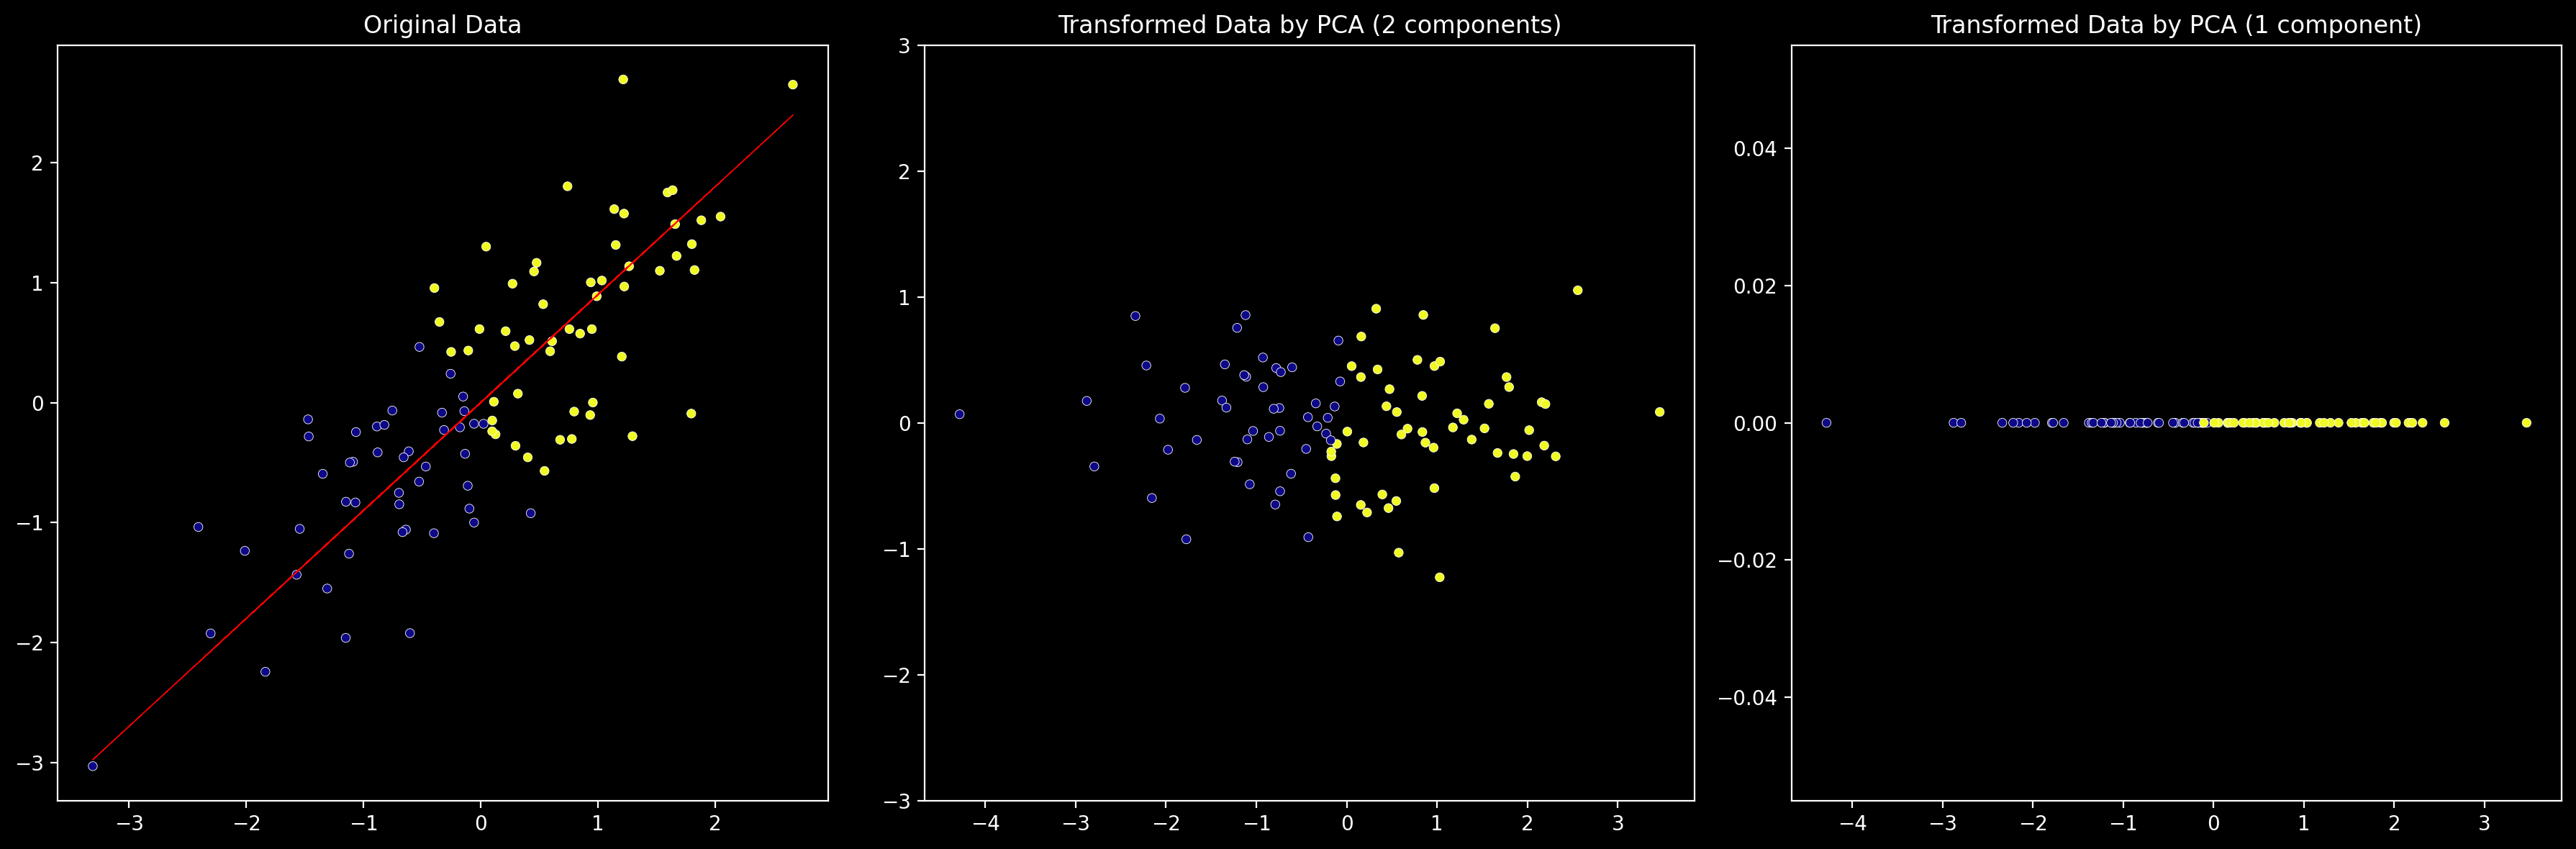

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PCA import PCA  

# Generate data
np.random.seed(40)
μ = [0, 0]  # Mean of the distribution
Σ = [[1, 0.7], [0.7, 1]]  # Covariance matrix

# TODO 1: Generate multivariate normal data with the parameters above using Numpy (100 samples)
x_data = np.random.multivariate_normal(mean=μ, cov=Σ, size=100)
x1, x2 = x_data[:, 0], x_data[:, 1]
y_data = ((x2 - (-1.5 * x1 + -0.1)) > 0) + 1                
corr_line = lambda x: 0.9 * x + 0                   # correlation line
# TODO 2: Perform PCA with two components 
pca = PCA(new_dim=2)
z_data = pca.fit_transform(x_data)

# TODO 3: Perform PCA with one component
pca = PCA(new_dim=1)
z_data_1d = pca.fit_transform(x_data)

# Create subplots
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)

# Plot original data and line
axs[0].scatter(x_data[:, 0], x_data[:, 1], s=20, c=y_data, cmap='plasma', edgecolors='white', linewidths=0.3)
axs[0].plot(x_data[:, 0], corr_line(x_data[:, 0]), color='red', linewidth=0.5)
axs[0].set_title("Original Data")

# Plot transformed data by PCA with 2 components
axs[1].scatter(z_data[:, 0], z_data[:, 1], s=20, c=y_data, cmap='plasma', edgecolors='white', linewidths=0.3)
axs[1].set_ylim(-3, 3)
axs[1].set_title("Transformed Data by PCA (2 components)")

# Plot transformed data by PCA with 1 component
axs[2].scatter(z_data_1d, np.zeros_like(z_data_1d), s=20, c=y_data, cmap='plasma', edgecolors='white', linewidths=0.3)
axs[2].set_title("Transformed Data by PCA (1 component)")

plt.tight_layout()
plt.show()

#### Questions to Consider:

- It's obvious from the first figure that the data is linearly seperable, have we lost this separability after doing doing PCA in the next two plots?

In [7]:
'''
Answer Goes Here
'''

'\nAnswer Goes Here\n'

- Any orthogonal matrix corresponds to a specific type of transformation (read about that). Use this and the fact that U is orthogonal to explain the relationship between the points in the first and second plot.

In [8]:
'''

U is orthogonal, the transformation only rotates the data into the new coordinate system
The relative positions between points remain the same
'''

'\n\nU is orthogonal, the transformation only rotates the data into the new coordinate system\nThe relative positions between points remain the same\n'


- In terms of projection, explain the relationship of the points in the first and third plot

In [9]:
'''
Answer Goes Here
'''

'\nAnswer Goes Here\n'

<div align="center">
<img src="https://media1.tenor.com/m/H-bzshVnNR4AAAAC/you-are-awesome-well-done.gif" width=900>
</div>

## ⭐ Extra Requirements

The singular value decomposition of a matrix $A$ takes the form:

$$A_{m×n} = U_{m×m} \Sigma_{m×n} V_{n×n}^T$$

It associates the matrix $A$ with:
- $m$ left singular vectors (columns of $U$)
- $n$ right singular vectors (columns of $V$)
- $min(m,n)$ singular values

It can be easily shown that the $n$ right singular vectors (columns of $V$) are the $n$ eigenvectors of $A^TA$ and the $m$ left singular vectors are the $m$ eigenvectors of $AA^T$. 

Meanwhile, the singular values are the square roots of the eigenvalues of either $A^TA$ or $AA^T$


**Consider the following fact:**

In [10]:
import numpy as np

# Generate random data from the multivariate normal distribution
m = 10000
x_data = np.random.multivariate_normal(μ, Σ, m)

covariance_matrix = x_data.T @ x_data / (m - 1)


assert np.allclose(np.cov(x_data, rowvar=False), covariance_matrix, rtol=0.001)

That is, with zero-meaned (or standardized) data $X_{m×n}$, we have $$Σ=\frac{X^TX}{(m-1)}$$

Thus, we can solve the singular value decomposition of $\frac{X}{\sqrt{m-1}}$ and then use its right singular vectors $A=V^T$ instead of doing eigendecompostion of $Σ$ and then using the eigenvectors $A=U^T$

In [11]:
# solve eigendecomposition of the covariance matrix
λs, U = np.linalg.eig(np.cov(x_data, rowvar=False))

# solve singular value decomposition of X
U_svd, S, Vt = np.linalg.svd(x_data/(m-1)**0.5)


assert np.allclose(np.abs(U), np.abs(Vt.T), rtol=1e-2)
assert (np.allclose(np.flip(λs), S**2, rtol=1e-2) or np.allclose(λs, S**2, rtol=1e-2))                    

The benefits of doing this over eigendecomposition:

- Computing the SVD from `x_train` directly is more computationally stable and possibly more efficient that computing Σ then eigendecomposition

- The singular values in `S` will be ordered descendingly automatically (it's part of SVD definition) and they are just squares of the needed eigenvalues

- Knowing more machine learning mathematics like this can be helpful for other algorithms as well (e.g., psuedo inverses and linear regression)

### ✨ Extra Requirements List

- Revisit the implementation and use singular value decomposition instead of eigenvalue decomposition

- If `new_dim` is a float between $0$ and $1$, then find the number of components $L$ such that the sum of their variances (eigenvalues) over the sum of the total variance (all eigenvalues) is at least `new_dim`. Check out `np.cumsum` for that.

<div align="center">
<img src="https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExeWd6OGhvc2lqcGtwajhpZHVxaWFnNGRxeXA4b2s3cXI3aG1xNXd6NiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/l49JHLpRSLhecYEmI/giphy.gif">
</div>

In [21]:
# Generate sample data
x_data= load_iris().data

# Define PCA models
pca = PCA(new_dim=4)                # full dimensionality so inverse approximation will be exact

z_data = pca.fit_transform_svd(x_data)

assert np.allclose(pca.inverse_transform(z_data), x_data)

4 (4, 4)
